In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')

## CSV 파일 불러오기

In [2]:
df = pd.read_csv('/Users/jeongmin/opt/anaconda3/python/practice1.csv')

## 데이터 확인하기

In [3]:
df

,ord_seq,is_w1_ord,mem_cnt
0,1,0,20
1,1,1,80
2,2,0,20
3,2,1,80
4,3,0,20
...,...,...,...
56,33,1,3
57,34,1,3
58,35,1,2
59,36,1,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ord_seq    61 non-null     int64
 1   is_w1_ord  61 non-null     int64
 2   mem_cnt    61 non-null     int64
dtypes: int64(3)
memory usage: 1.6 KB


## 첫 주문 이후 1주일 이내 주문여부에 따라 코호트 나누기

In [9]:
true = df[df.is_w1_ord == 1]
false = df[df.is_w1_ord == 0]

In [18]:
true

,ord_seq,is_w1_ord,mem_cnt,retention
1,1,1,80,1.0000
3,2,1,80,1.0000
5,3,1,80,1.0000
7,4,1,78,0.9750
9,5,1,78,0.9750
11,6,1,76,0.9500
13,7,1,72,0.9000
15,8,1,66,0.8250
17,9,1,62,0.7750
19,10,1,53,0.6625


In [13]:
false

,ord_seq,is_w1_ord,mem_cnt
0,1,0,20
2,2,0,20
4,3,0,20
6,4,0,20
8,5,0,17
10,6,0,14
12,7,0,11
14,8,0,9
16,9,0,7
18,10,0,5


## 그룹별 리텐션 구하기

In [15]:
true['retention'] = true['mem_cnt'] / 80
false['retention'] = false['mem_cnt'] / 20 

/var/folders/_t/6mlqdw8s3m77mzp3glbssq380000gn/T/ipykernel_1665/2254027933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['retention'] = true['mem_cnt'] / 80
/var/folders/_t/6mlqdw8s3m77mzp3glbssq380000gn/T/ipykernel_1665/2254027933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false['retention'] = false['mem_cnt'] / 20


## 그룹별 1달 간 주문수에 따라 리텐션 확인하기

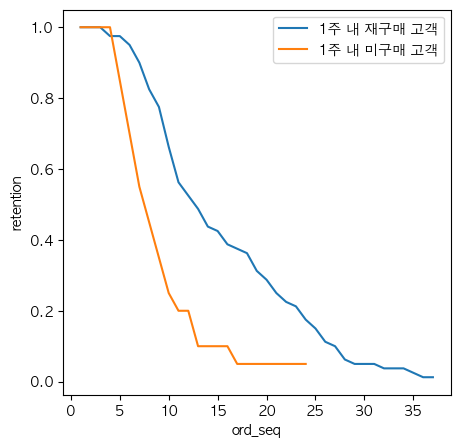

In [17]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

ax.plot(true['ord_seq'], true['retention'], label='1주 내 재구매 고객')
ax.plot(false['ord_seq'], false['retention'], label='1주 내 미구매 고객')

plt.ylabel('retention')
plt.xlabel('ord_seq')

ax.legend()
